# MIE451 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented


In [1]:
# check the current python version
import sys
print(sys.version)

!pip install folium
!pip install tqdm
!pip install numpy
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install scipy
!pip install geopy
!pip install tabulate
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('reviews.csv',
                          header=None,
                          names=columnNames)

# Q1

In [4]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [5]:
reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewColumn','vader'])

100%|██████████| 3686/3686 [00:05<00:00, 665.70it/s]


In [6]:
finalDF = hotelDf.merge(reviewDF, on='reviewColumn')
finalDF

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,vader
0,data/ca/499287/672351/774397750.html,Shamrock Lodge,"""My husband and I stayed 2 nights over Canadia...",3,negative,"October 15, 2020",1090 Shamrock Road,"('Port Carling',)",Ontario,P0B 1J0,0.8876
1,data/ca/499287/672351/526241245.html,Shamrock Lodge,"""Shamrock Lodge provides an excellent getaway ...",5,positive,"September 21, 2017",1090 Shamrock Road,"('Port Carling',)",Ontario,P0B 1J0,0.9903
2,data/ca/499287/672351/764600540.html,Shamrock Lodge,"""My extended family and I stayed here august 9...",5,positive,"August 13, 2020",1090 Shamrock Road,"('Port Carling',)",Ontario,P0B 1J0,0.8020
3,data/ca/499287/672351/587621678.html,Shamrock Lodge,"""I was so impressed with the quality of food a...",5,positive,"June 15, 2018",1090 Shamrock Road,"('Port Carling',)",Ontario,P0B 1J0,0.9230
4,data/ca/499287/672351/765284253.html,Shamrock Lodge,"""Shamrock Lodge- an all inclusive family resor...",5,positive,"August 16, 2020",1090 Shamrock Road,"('Port Carling',)",Ontario,P0B 1J0,0.9184
...,...,...,...,...,...,...,...,...,...,...,...
3681,data/ca/1568558/1567315/808630388.html,Trillium Resort and Spa,"""After much anticipation (our original reserva...",3,negative,"September 6, 2021",848 Clearwater Lake Rd,"('Port Sydney',)",Ontario,P0B 1L0,0.9957
3682,data/ca/1568558/1567315/776167769.html,Trillium Resort and Spa,"""My husband and I stayed for one night on a pa...",4,positive,"October 31, 2020",848 Clearwater Lake Rd,"('Port Sydney',)",Ontario,P0B 1L0,0.9938
3683,data/ca/1568558/1567315/657610771.html,Trillium Resort and Spa,"""We had a great little weekend getaway at Tril...",5,positive,"March 10, 2019",848 Clearwater Lake Rd,"('Port Sydney',)",Ontario,P0B 1L0,0.9766
3684,data/ca/1568558/1567315/809303677.html,Trillium Resort and Spa,"""My wife and I were fortunate enough to have o...",5,positive,"September 10, 2021",848 Clearwater Lake Rd,"('Port Sydney',)",Ontario,P0B 1L0,0.9911


In [7]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewColumn']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [8]:
avg_rating_df = avg_rating_per_hotel(finalDF)
avg_rating_df= avg_rating_df.drop(avg_rating_df[avg_rating_df.n_reviews < 50].index)
avg_rating_df


,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Algonquin Moon,0.971050,4.960000,100
Arrowhead Inn,0.408178,3.265823,79
Bartlett Lodge,0.931924,4.810000,100
Beacon Shore Bed &amp; Breakfast,0.970057,4.990000,100
Beauview Cottage Resort,0.965428,4.860000,100
Best Western Plus Muskoka Inn,0.848683,4.500000,100
Blue Water Acres,0.734091,3.805195,77
Cedar Grove Lodge,0.939557,4.670000,100
Colonial Bay Cottages,0.867248,4.404762,84


In [9]:
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore
34,Tucked Inn the Harbour B&amp;B,5.000000
3,Beacon Shore Bed &amp; Breakfast,4.990000
24,Ogopogo Resort,4.980000
30,Swallowdale Inn B &amp; B,4.963415
0,Algonquin Moon,4.960000


In [10]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderTop5

,hotelName,AverageVader
0,Algonquin Moon,0.971050
3,Beacon Shore Bed &amp; Breakfast,0.970057
34,Tucked Inn the Harbour B&amp;B,0.967495
4,Beauview Cottage Resort,0.965428
32,Tranquil Woods Victorian Inn,0.964645


In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+----------------------------------+----------------------------------+
|   Rank | avg Rating                       | avg Vader                        |
+========+==================================+==================================+
|      0 | Tucked Inn the Harbour B&amp;B   | Algonquin Moon                   |
+--------+----------------------------------+----------------------------------+
|      1 | Beacon Shore Bed &amp; Breakfast | Beacon Shore Bed &amp; Breakfast |
+--------+----------------------------------+----------------------------------+
|      2 | Ogopogo Resort                   | Tucked Inn the Harbour B&amp;B   |
+--------+----------------------------------+----------------------------------+
|      3 | Swallowdale Inn B &amp; B        | Beauview Cottage Resort          |
+--------+----------------------------------+----------------------------------+
|      4 | Algonquin Moon                   | Tranquil Woods Vic

In [ ]:
avgRatingBottom5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].tail(5)
avgRatingBottom5

,hotelName,AverageRatingScore
14,"Hidden Valley Resort, Ascend Hotel Collection",3.350000
1,Arrowhead Inn,3.265823
11,Econolodge Huntsville,3.220000
10,Deerhurst Resort,3.100000
27,Red Maple Inn and Suites,2.150000


In [ ]:
avgVaderBottom5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].tail(5)
avgVaderBottom5

,hotelName,AverageVader
16,Huntsville Inn,0.600253
14,"Hidden Valley Resort, Ascend Hotel Collection",0.557976
1,Arrowhead Inn,0.408178
10,Deerhurst Resort,0.380088
27,Red Maple Inn and Suites,0.033808


In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderBottom5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingBottom5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Bottom 5 hotels avg rating vs. avg vader score:
+--------+-----------------------------------------------+-----------------------------------------------+
|   Rank | avg Rating                                    | avg Vader                                     |
+========+===============================================+===============================================+
|      0 | Hidden Valley Resort, Ascend Hotel Collection | Huntsville Inn                                |
+--------+-----------------------------------------------+-----------------------------------------------+
|      1 | Arrowhead Inn                                 | Hidden Valley Resort, Ascend Hotel Collection |
+--------+-----------------------------------------------+-----------------------------------------------+
|      2 | Econolodge Huntsville                         | Arrowhead Inn                                 |
+--------+-----------------------------------------------+--------------------------------------

There are some overlap in the top and bottom 5 ranking. This indicates that sentiment and rating doesn't always agree. Sometimes, guests may be satisfied with the service but does not represent it with extreme sentiment.

# Q2

In [11]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

In [12]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [13]:
topkGroundTruthPos = getTopK(df=finalDF, kwords=50, label_value='positive')
topkGroundTruthNeg = getTopK(df=finalDF, kwords=50, label_value='negative')

In [ ]:
topkGroundTruthPos

[('great', 1675),
 ('clean', 1352),
 ('breakfast', 1110),
 ('place', 1090),
 ('lake', 1051),
 ('stayed', 1036),
 ('would', 1019),
 ('time', 1004),
 ('comfortable', 920),
 ('well', 913),
 ('nice', 902),
 ('good', 899),
 ('friendly', 872),
 ('back', 789),
 ('one', 785),
 ('beautiful', 776),
 ('food', 717),
 ('wonderful', 688),
 ('area', 678),
 ('also', 652),
 ('day', 647),
 ('nthe', 646),
 ('night', 635),
 ('lodge', 630),
 ('huntsville', 626),
 ('park', 625),
 ('family', 609),
 ('resort', 598),
 ('inn', 589),
 ('recommend', 579),
 ('amazing', 562),
 ('cottage', 556),
 ('like', 552),
 ('everything', 544),
 ('location', 531),
 ('could', 515),
 ('algonquin', 513),
 ('perfect', 507),
 ('made', 505),
 ('cabin', 505),
 ('enjoyed', 504),
 ('lovely', 499),
 ('view', 484),
 ('experience', 482),
 ('really', 477),
 ('hosts', 471),
 ('two', 470),
 ('weekend', 468),
 ('water', 460),
 ('home', 460)]

In [ ]:
topkGroundTruthNeg

[('would', 474),
 ('one', 377),
 ('night', 331),
 ('clean', 299),
 ('good', 296),
 ('breakfast', 273),
 ('resort', 266),
 ('get', 253),
 ('time', 245),
 ('place', 243),
 ('could', 228),
 ('back', 222),
 ('nthe', 218),
 ('desk', 214),
 ('front', 213),
 ('stayed', 211),
 ('told', 207),
 ('nice', 198),
 ('like', 197),
 ('well', 192),
 ('even', 191),
 ('u2019t', 188),
 ('bed', 176),
 ('also', 169),
 ('day', 164),
 ('two', 157),
 ('check', 154),
 ('bathroom', 150),
 ('said', 150),
 ('booked', 147),
 ('first', 144),
 ('food', 143),
 ('water', 141),
 ('small', 141),
 ('great', 141),
 ('price', 141),
 ('service', 139),
 ('never', 138),
 ('really', 138),
 ('area', 137),
 ('people', 134),
 ('huntsville', 133),
 ('cottage', 133),
 ('guests', 132),
 ('went', 127),
 ('motel', 126),
 ('got', 124),
 ('left', 120),
 ('door', 119),
 ('friendly', 119)]

Clean,Friendly - appeared in both positive and negative

The negative words don't seem that negative

In [14]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [15]:
# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
      
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

def getTopKP(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k) 
    return topk

In [16]:
topkPhrasePos = getTopKP(finalDF, k=50, label_value="positive")
topkPhraseNeg = getTopKP(finalDF, k=50, label_value="negative")

In [ ]:
topkPhrasePos

[('algonquin park', 224),
 ('next year', 102),
 ('front desk', 74),
 ('great time', 70),
 ('hot tub', 70),
 ('first time', 66),
 ('great place', 64),
 ('bartlett lodg', 57),
 ('beacon shore', 52),
 ('heather lodg', 51),
 ('cedar grove', 46),
 ('killarney lodg', 45),
 ('short drive', 43),
 ('log cabin inn', 42),
 ('next time', 41),
 ('great view', 41),
 ('tranquil wood', 41),
 ('muskoka chair', 40),
 ('great locat', 39),
 ('shamrock lodg', 38),
 ('comfort bed', 38),
 ('coffe maker', 38),
 ('coloni bay', 37),
 ('minut drive', 36),
 ('wonder time', 35),
 ('arrowhead provinci park', 35),
 ('fairi bay guest hous', 35),
 ('algonquin moon', 34),
 ('wonder host', 33),
 ('log cabin', 33),
 ('main lodg', 32),
 ('paddl boat', 31),
 ('fire pit', 31),
 ('georgian bay', 31),
 ('paddl board', 30),
 ('perfect place', 30),
 ('delici breakfast', 30),
 ('tulip inn', 30),
 ('bedroom cottag', 29),
 ('queen bed', 29),
 ('continent breakfast', 29),
 ('swallowdal inn', 29),
 ('nice place', 28),
 ('comfort inn

In [ ]:
topkPhraseNeg

[('front desk', 117),
 ('hot tub', 37),
 ('credit card', 36),
 ('first night', 24),
 ('algonquin park', 22),
 ('hot water', 22),
 ('park lot', 21),
 ('next day', 18),
 ('custom servic', 16),
 ('second night', 16),
 ('next morn', 15),
 ('coffe maker', 15),
 ('first time', 14),
 ('arrowhead park', 12),
 ('hidden valley', 11),
 ('comfort inn', 10),
 ('continent breakfast', 10),
 ('second day', 10),
 ('econo lodg', 10),
 ('outdoor pool', 9),
 ('indoor pool', 9),
 ('patio door', 8),
 ('front door', 8),
 ('doubl bed', 8),
 ('arrowhead provinci park', 8),
 ('second time', 8),
 ('horribl experi', 8),
 ('bedroom cottag', 8),
 ('small fridg', 8),
 ('hidden valley resort', 8),
 ('previou guest', 8),
 ('first floor', 8),
 ('tulip inn', 7),
 ('nice place', 7),
 ('holiday inn', 7),
 ('arrowhead inn', 7),
 ('good thing', 7),
 ('queen bed', 7),
 ('good place', 7),
 ('plu side', 7),
 ('phone call', 7),
 ('free breakfast', 7),
 ('mr white', 7),
 ('mani year', 7),
 ('good size', 7),
 ('nthe breakfast', 7

Similar to the words, the negative phrases are usually not completely negative. In addition, there are many overlapping words between negative and positive words, but seems like observation around the hotel that is commonly noticed in either bad or good reviews.

below code from website:https://www.programcreek.com/python/example/91255/nltk.RegexpParser

In [17]:
grammar1 = r"""
                        VP: {<ADJ_SIM><V_PRS>}
                        VP: {<ADJ_INO><V.*>}
                        VP: {<V_PRS><N_SING><V_SUB>}
                        NP: {<N_SING><ADJ.*><N_SING>}
                        NP: {<N.*><PRO>}
                        VP: {<N_SING><V_.*>}
                        VP: {<V.*>+}
                        NP: {<ADJ.*>?<N.*>+ <ADJ.*>?}
                        DNP: {<DET><NP>}
                        PP: {<ADJ_CMPR><P>}
                        PP: {<ADJ_SIM><P>}
                        PP: {<P><N_SING>}
                        PP: {<P>*}
                        DDNP: {<NP><DNP>}
                        NPP: {<PP><NP>+}
                        """
chunker=nltk.RegexpParser(grammar1) 

In [18]:
topkPhrasePos1 = getTopKP(finalDF, k=50, label_value="positive")
topkPhraseNeg1 = getTopKP(finalDF, k=50, label_value="negative")

In [ ]:
topkPhrasePos1

[('algonquin park', 243),
 ('front desk', 76),
 ('bartlett lodg', 59),
 ('beacon shore', 57),
 ('heather lodg', 55),
 ('killarney lodg', 49),
 ('coffe maker', 48),
 ('cedar grove', 48),
 ('log cabin inn', 44),
 ('shamrock lodg', 42),
 ('muskoka chair', 42),
 ('tranquil wood', 42),
 ('fire pit', 41),
 ('arrowhead provinci park', 38),
 ('log cabin', 38),
 ('fairi bay guest hous', 37),
 ('coloni bay', 35),
 ('algonquin moon', 35),
 ('tulip inn', 33),
 ('weekend getaway', 32),
 ('minut drive', 32),
 ('fairi lake', 32),
 ('comfort inn', 31),
 ('bedroom cottag', 29),
 ('morgan hous', 29),
 ('rainbow inn', 29),
 ('huntsvil area', 28),
 ('swallowdal inn', 28),
 ('custom servic', 26),
 ('park lot', 26),
 ('lake view', 25),
 ('algonquin provinci park', 24),
 ('walker lake resort', 24),
 ('tuck inn', 24),
 ('georgian bay', 23),
 ('famili vacat', 22),
 ('pine lodg', 21),
 ('great locat', 20),
 ('cedar grove lodg', 20),
 ('resid inn', 20),
 ('pine lodg inn', 20),
 ('life jacket', 19),
 ('arrowhead 

In [ ]:
topkPhraseNeg1

[('front desk', 108),
 ('credit card', 39),
 ('custom servic', 26),
 ('algonquin park', 22),
 ('park lot', 22),
 ('coffe maker', 19),
 ('arrowhead park', 13),
 ('comfort inn', 11),
 ('econo lodg', 11),
 ('hidden valley', 10),
 ('arrowhead provinci park', 8),
 ('holiday inn', 8),
 ('bedroom cottag', 8),
 ('hidden valley resort', 8),
 ('tenni court', 8),
 ('phone call', 8),
 ('tim horton', 8),
 ('tulip inn', 7),
 ('air condit', 7),
 ('air condition', 7),
 ('mr white', 7),
 ('continent breakfast', 7),
 ('trillium resort', 7),
 ('patio door', 6),
 ('minut drive', 6),
 ('arrowhead inn', 6),
 ('wi fi', 6),
 ('resort fee', 6),
 ('hospit industri', 6),
 ('breakfast area', 6),
 ('space heater', 6),
 ('golf cours', 6),
 ('lake view', 6),
 ('killarney lodg', 6),
 ('water damag', 5),
 ('toilet paper', 5),
 ('musti smell', 5),
 ('life jacket', 5),
 ('muskoka chair', 5),
 ('recept desk', 5),
 ('hour drive', 5),
 ('bed bug', 5),
 ('huntsvil inn', 5),
 ('ice machin', 4),
 ('fire pit', 4),
 ('cigarett 

In [ ]:
grammar2 = r"""
            NBAR:
            {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
            VP:
            {<V.*>}  # terminated with Verbs
            NP:
            {<NBAR>}
            {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc..."""

chunker=nltk.RegexpParser(grammar2) 

In [ ]:
topkPhrasePos2 = getTopKP(finalDF, k=50, label_value="positive")
topkPhraseNeg2 = getTopKP(finalDF, k=50, label_value="negative")

In [ ]:
topkPhrasePos2

[('algonquin park', 224),
 ('next year', 102),
 ('front desk', 74),
 ('great time', 70),
 ('hot tub', 70),
 ('first time', 66),
 ('great place', 64),
 ('bartlett lodg', 57),
 ('beacon shore', 52),
 ('heather lodg', 51),
 ('cedar grove', 46),
 ('killarney lodg', 45),
 ('short drive', 43),
 ('log cabin inn', 42),
 ('next time', 41),
 ('great view', 41),
 ('tranquil wood', 41),
 ('muskoka chair', 40),
 ('great locat', 39),
 ('shamrock lodg', 38),
 ('comfort bed', 38),
 ('coffe maker', 38),
 ('coloni bay', 37),
 ('minut drive', 36),
 ('wonder time', 35),
 ('arrowhead provinci park', 35),
 ('fairi bay guest hous', 35),
 ('algonquin moon', 34),
 ('wonder host', 33),
 ('log cabin', 33),
 ('main lodg', 32),
 ('paddl boat', 31),
 ('fire pit', 31),
 ('georgian bay', 31),
 ('paddl board', 30),
 ('perfect place', 30),
 ('delici breakfast', 30),
 ('tulip inn', 30),
 ('bedroom cottag', 29),
 ('queen bed', 29),
 ('continent breakfast', 29),
 ('swallowdal inn', 29),
 ('nice place', 28),
 ('comfort inn

In [ ]:
topkPhraseNeg2

[('front desk', 117),
 ('hot tub', 37),
 ('credit card', 36),
 ('first night', 24),
 ('algonquin park', 22),
 ('hot water', 22),
 ('park lot', 21),
 ('next day', 18),
 ('custom servic', 16),
 ('second night', 16),
 ('next morn', 15),
 ('coffe maker', 15),
 ('first time', 14),
 ('arrowhead park', 12),
 ('hidden valley', 11),
 ('comfort inn', 10),
 ('continent breakfast', 10),
 ('second day', 10),
 ('econo lodg', 10),
 ('outdoor pool', 9),
 ('indoor pool', 9),
 ('patio door', 8),
 ('front door', 8),
 ('doubl bed', 8),
 ('arrowhead provinci park', 8),
 ('second time', 8),
 ('horribl experi', 8),
 ('bedroom cottag', 8),
 ('small fridg', 8),
 ('hidden valley resort', 8),
 ('previou guest', 8),
 ('first floor', 8),
 ('tulip inn', 7),
 ('nice place', 7),
 ('holiday inn', 7),
 ('arrowhead inn', 7),
 ('good thing', 7),
 ('queen bed', 7),
 ('good place', 7),
 ('plu side', 7),
 ('phone call', 7),
 ('free breakfast', 7),
 ('mr white', 7),
 ('mani year', 7),
 ('good size', 7),
 ('nthe breakfast', 7

# Q3

In [19]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    stop.add('judy')
    stop.add('harry')
    stop.add('nancy')
    stop.add('bob')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [20]:
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)

In [21]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [22]:
miScoredf = getMI(topk, finaldf)

In [ ]:
miScoredf.head(50)

,Word,MI Score
156,told,0.033788
395,dirty,0.029304
62,hosts,0.025297
94,desk,0.022920
0,great,0.021879
27,wonderful,0.021820
89,delicious,0.017173
51,perfect,0.017125
43,amazing,0.016100
492,smell,0.015253


In [23]:
grammar1 = r"""
                        VP: {<ADJ_SIM><V_PRS>}
                        VP: {<ADJ_INO><V.*>}
                        VP: {<V_PRS><N_SING><V_SUB>}
                        NP: {<N_SING><ADJ.*><N_SING>}
                        NP: {<N.*><PRO>}
                        VP: {<N_SING><V_.*>}
                        VP: {<V.*>+}
                        NP: {<ADJ.*>?<N.*>+ <ADJ.*>?}
                        DNP: {<DET><NP>}
                        PP: {<ADJ_CMPR><P>}
                        PP: {<ADJ_SIM><P>}
                        PP: {<P><N_SING>}
                        PP: {<P>*}
                        DDNP: {<NP><DNP>}
                        NPP: {<PP><NP>+}
                        """
chunker=nltk.RegexpParser(grammar1) 

In [24]:
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [25]:
topk_phrase = getTopKNP(finaldf, 50) 
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)

In [26]:
miScoredf = getMI(topk_phrase, finaldf_phrase)
miScoredf.head(50)

,Word,MI Score
1,front desk,1.204841e-02
17,credit card,8.486367e-03
0,algonquin park,3.032456e-03
7,custom servic,2.570023e-03
4,beacon shore,2.496096e-03
16,tranquil wood,2.137547e-03
13,log cabin inn,2.077853e-03
23,fairi bay guest hous,2.018177e-03
9,park lot,1.972703e-03
24,algonquin moon,1.958520e-03


# Q4

In [27]:
def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf

In [28]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [29]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive')

100%|██████████| 500/500 [00:01<00:00, 262.87it/s]


In [ ]:
#Sorted top pmi words for positive reviews
pmiposdf.sort_values('pmi',ascending=0).head(50)

,pmi
beauview,0.217665
bob,0.217665
shamrock,0.217665
judy,0.217665
nancy,0.217665
gord,0.217665
harry,0.217665
carol,0.217665
steve,0.217665
hosts,0.215309


In [ ]:
#Sorted top pmi words for negative reviews
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:01<00:00, 351.08it/s]


,pmi
dirty,1.545716
smell,1.335392
told,1.330073
cleaned,1.200875
pay,1.192291
paid,1.176596
bad,1.136962
someone,1.135221
said,1.082059
money,1.077624


In [ ]:
pmiposdf_phase = pmiForAllCal(finaldf_phrase, topk_phrase,'positive')
pmiposdf_phase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 127.56it/s]


,pmi
swallowdal inn,0.217665
shamrock lodg,0.217665
fairi bay guest hous,0.217665
algonquin moon,0.217665
beacon shore,0.217665
georgian bay,0.217665
tranquil wood,0.217665
tuck inn,0.217665
walker lake resort,0.217665
log cabin,0.217665


In [ ]:
pminegdf_phase = pmiForAllCal(finaldf_phrase, topk_phrase,'negative')
pminegdf_phase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 417.66it/s]


,pmi
credit card,1.548276
front desk,0.988521
custom servic,0.875332
park lot,0.820728
arrowhead park,0.730871
continent breakfast,0.581836
hidden valley,0.581836
coffe maker,0.371404
trillium resort,0.332375
comfort inn,0.245364


In [ ]:
tophotelDf = hotelDf[hotelDf['hotelName']=='Algonquin Moon']
botttomhotelDf = hotelDf[hotelDf['hotelName']=='Deerhurst Resort']

In [ ]:
tophotelDf = hotelDf[hotelDf['hotelName']=='Algonquin Moon'].reset_index()
topHotelReviewDf = evalSentences(tophotelDf['reviewColumn'], to_df=True, columns=['reviewColumn','vader'])

100%|██████████| 100/100 [00:00<00:00, 353.08it/s]


In [ ]:
bottomhotelDf = hotelDf[hotelDf['hotelName']=='Deerhurst Resort'].reset_index()
bottomHotelReviewDf = evalSentences(bottomhotelDf['reviewColumn'], to_df=True, columns=['reviewColumn','vader'])

100%|██████████| 100/100 [00:00<00:00, 947.73it/s]


In [ ]:
topk = getTopKWords(topHotelReviewDf, 500)
topHotelFinalDf = dataFrameTransformation(tophotelDf, topHotelReviewDf,topk)
pmiposword_q4 = pmiForAllCal(topHotelFinalDf, topk, 'positive' )
pminegword_q4 = pmiForAllCal(topHotelFinalDf, topk, 'negative' )

100%|██████████| 500/500 [00:00<00:00, 569.71it/s]


In [ ]:
topk_bottom = getTopKWords(bottomHotelReviewDf, 500)
bottomHotelFinalDf = dataFrameTransformation(bottomhotelDf, bottomHotelReviewDf,topk_bottom)
bottompmiposword_q4 = pmiForAllCal(bottomHotelFinalDf, topk_bottom, 'positive' )
bottompminegword_q4 = pmiForAllCal(bottomHotelFinalDf, topk_bottom, 'negative' )

100%|██████████| 500/500 [00:00<00:00, 998.92it/s]


In [ ]:
pmiposword_q4.head(50)

,pmi
janet,0.01005
algonquin,0.01005
steve,0.01005
breakfast,0.01005
stayed,0.01005
park,0.01005
hosts,0.01005
moon,0.01005
great,0.01005
wonderful,0.01005


In [ ]:
pminegword_q4.tail(50)

,pmi
anyone,-5.703782
nature,-5.703782
mention,-5.703782
spotlessly,-5.703782
accommodating,-5.703782
thought,-5.703782
paul,-5.703782
dear,-5.298317
travelled,-5.703782
seen,-5.703782


In [ ]:
bottompmiposword_q4.head(50)

,pmi
resort,-0.142316
deerhurst,0.223144
great,0.593517
would,-0.133531
clean,0.178692
time,0.136132
good,-0.273293
food,-0.228842
nice,-0.133531
experience,0.274437


In [ ]:
bottompminegword_q4.tail(50)

,pmi
watching,-0.182322
resorts,-9.392662
near,-9.392662
future,-9.392662
bill,-0.182322
appears,-0.182322
excited,0.510826
unfortunately,-0.182322
less,0.510826
read,-0.182322


In [ ]:
finalDF_TOPHOTEL = tophotelDf.merge(topHotelReviewDf, on='reviewColumn')
topk_phrase_q4 = getTopKNP(finalDF_TOPHOTEL, 50) 
topHotelFinalphraseDf = NPdataFrameTransformation(finalDF_TOPHOTEL, topHotelReviewDf, topk_phrase_q4)


pmiposphrase_q4 = pmiForAllCal(topHotelFinalphraseDf, topk_phrase_q4, 'positive' )
pminegphrase_q4 = pmiForAllCal(topHotelFinalphraseDf, topk_phrase_q4, 'negative' )

100%|██████████| 50/50 [00:00<00:00, 1082.19it/s]


In [ ]:
finalDF_BOTTOMHOTEL = bottomhotelDf.merge(bottomHotelReviewDf, on='reviewColumn')
topk_phrase_q4_bottom = getTopKNP(finalDF_BOTTOMHOTEL, 50) 
bottomHotelFinalphraseDf = NPdataFrameTransformation(finalDF_BOTTOMHOTEL, bottomHotelReviewDf, topk_phrase_q4_bottom)


bottom_pmiposphrase_q4 = pmiForAllCal(bottomHotelFinalphraseDf, topk_phrase_q4_bottom, 'positive' )
bottom_pminegphrase_q4 = pmiForAllCal(bottomHotelFinalphraseDf, topk_phrase_q4_bottom, 'negative' )

100%|██████████| 50/50 [00:00<00:00, 919.76it/s]


In [ ]:
pmiposphrase_q4


,pmi
algonquin moon,0.01005
algonquin park,0.01005
log cabin,0.01005
host janet,0.01005
park pas,0.01005
fairi lake,0.01005
algonquin moon suit,0.01005
fresh fruit,0.01005
dog nicki,0.01005
homemad cooki,0.01005


In [ ]:
pminegphrase_q4

,pmi
algonquin moon,-8.101678
algonquin park,-7.649693
log cabin,-7.495542
host janet,-6.55108
park pas,-6.39693
fairi lake,-6.214608
algonquin moon suit,-5.991465
fresh fruit,-5.703782
dog nicki,-5.703782
homemad cooki,-5.703782


In [ ]:
bottom_pmiposphrase_q4.head(50)

,pmi
deerhurst resort,0.916291
lakesid lodg,0.223144
front desk,-9.680344
lake view,0.510826
gift card,-8.29405
resort fee,-9.392662
custom servic,-8.987197
park lot,-8.987197
compass restaur,0.916291
mainten guy,-8.29405


In [ ]:
bottom_pminegphrase_q4.tail(50)

,pmi
deerhurst resort,-10.308953
lakesid lodg,-0.182322
front desk,0.510826
lake view,-0.587787
gift card,0.510826
resort fee,0.510826
custom servic,0.510826
park lot,0.510826
compass restaur,-9.392662
mainten guy,0.510826


# Q5

**Note** Remember to save a static image of the map in the notebook

In [30]:
finaldf

,hotelName,ratingScore,groundTruth,reviewColumn,vader,great,clean,would,breakfast,place,...,killarney,cleaned,smell,choices,son,plan,point,beautifully,four,longer
0,Shamrock Lodge,3,negative,"""My husband and I stayed 2 nights over Canadia...",0.8876,0,0,1,1,0,...,0,1,1,0,0,0,0,0,0,0
1,Shamrock Lodge,5,positive,"""Shamrock Lodge provides an excellent getaway ...",0.9903,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shamrock Lodge,5,positive,"""My extended family and I stayed here august 9...",0.8020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shamrock Lodge,5,positive,"""I was so impressed with the quality of food a...",0.9230,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Shamrock Lodge,5,positive,"""Shamrock Lodge- an all inclusive family resor...",0.9184,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,Trillium Resort and Spa,3,negative,"""After much anticipation (our original reserva...",0.9957,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3682,Trillium Resort and Spa,4,positive,"""My husband and I stayed for one night on a pa...",0.9938,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3683,Trillium Resort and Spa,5,positive,"""We had a great little weekend getaway at Tril...",0.9766,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3684,Trillium Resort and Spa,5,positive,"""My wife and I were fortunate enough to have o...",0.9911,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

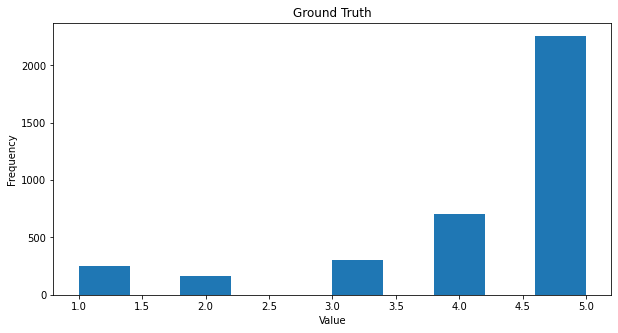

In [ ]:
getHistogram(finaldf,'ratingScore', 'Ground Truth')

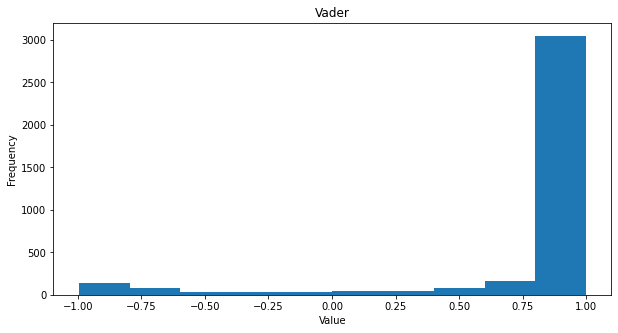

In [ ]:
getHistogram(finaldf,'vader', 'Vader')

In both vader and ground truth, the extremas (5 or 1) seem to have more frequency comparing to other values.

In [ ]:
finalDF = hotelDf.merge(reviewDF, on='reviewColumn')

In [ ]:
avg_rating_df = avg_rating_per_hotel(finalDF)
avg_rating_df= avg_rating_df.drop(avg_rating_df[avg_rating_df.n_reviews < 50].index)

In [ ]:
five_hotels = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName']].head(5)
#,'AverageRatingScore'

In [ ]:
for hotel in five_hotels['hotelName']:
  print(hotel)

Tucked Inn the Harbour B&amp;B
Beacon Shore Bed &amp; Breakfast
Ogopogo Resort
Swallowdale Inn B &amp; B
Algonquin Moon


In [ ]:
hotel_list = []
for hotel in five_hotels['hotelName']:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)

hotel_list

[2684    5
 2685    5
 2686    5
 2687    5
 2688    5
        ..
 2779    5
 2780    5
 2781    5
 2782    5
 2783    5
 Name: ratingScore, Length: 100, dtype: int64, 3384    5
 3385    5
 3386    5
 3387    5
 3388    5
        ..
 3479    5
 3480    5
 3481    5
 3482    5
 3483    5
 Name: ratingScore, Length: 100, dtype: int64, 2784    5
 2785    5
 2786    5
 2787    5
 2788    5
        ..
 2879    5
 2880    5
 2881    5
 2882    5
 2883    5
 Name: ratingScore, Length: 100, dtype: int64, 1532    5
 1533    5
 1534    5
 1535    5
 1536    5
        ..
 1609    5
 1610    5
 1611    5
 1612    4
 1613    5
 Name: ratingScore, Length: 82, dtype: int64, 1614    5
 1615    5
 1616    5
 1617    5
 1618    5
        ..
 1709    5
 1710    5
 1711    5
 1712    5
 1713    5
 Name: ratingScore, Length: 100, dtype: int64]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


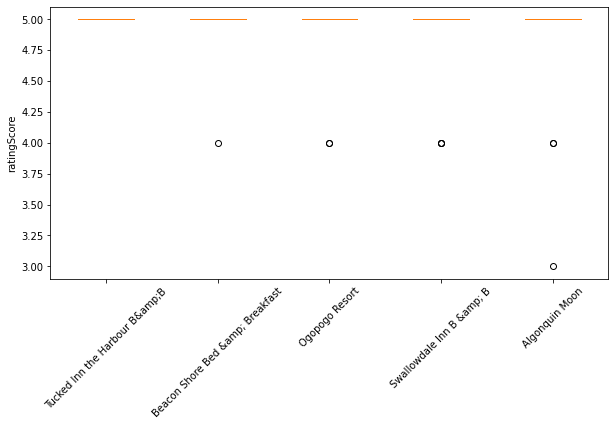

In [ ]:

hotel_list = []
hotel_=[]
for hotel in five_hotels['hotelName']:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_.append(hotel)
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10, 5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), hotel_,rotation=45)
plt.ylabel('ratingScore')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


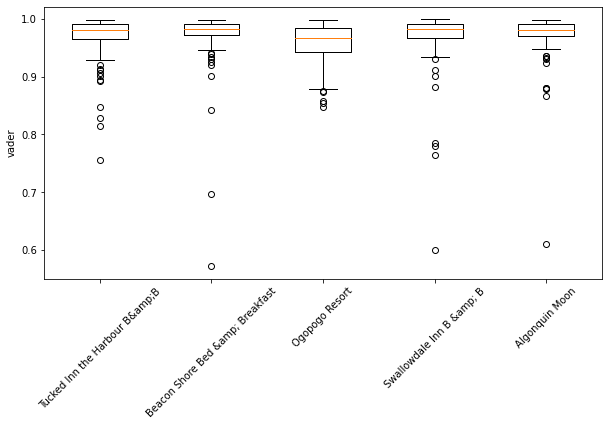

In [ ]:
hotel_list = []
hotel_=[]
for hotel in five_hotels['hotelName']:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_.append(hotel)
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10, 5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), hotel_,rotation=45)
plt.ylabel('vader')
plt.show()

In [ ]:
hotel_list = []
hotel_=[]
var=[]
for hotel in five_hotels['hotelName']:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel.mean())
  var.append(_hotel.var())
hotel_list

[5.0, 4.99, 4.98, 4.963414634146342, 4.96]

In [ ]:
var

[0.0,
 0.009999999999999998,
 0.019797979797979794,
 0.03568202348690155,
 0.05898989898989898]

In [ ]:
hotel_list_vad = []
var_vad=[]
for hotel in five_hotels['hotelName']:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list_vad.append(_hotel.mean())
  var_vad.append(_hotel.var())
hotel_list_vad

[0.9674950000000001,
 0.9700570000000001,
 0.9568760000000001,
 0.9641195121951219,
 0.9710499999999999]

In [ ]:
var_vad

[0.0016705081565656563,
 0.002926094394949496,
 0.0012157753777777777,
 0.003582961836796146,
 0.0020086584848484847]

It makes more sense to track mean and variance. When we are measuring for top 5, it is most likely that the boxplot won't show much difference as they are pretty much skewed (and clustered) to 5 or 1 depending on whether it is vader or ground truth. 

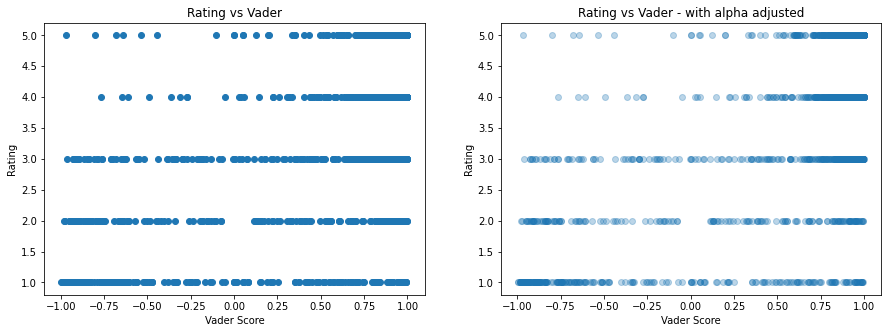

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

In [ ]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

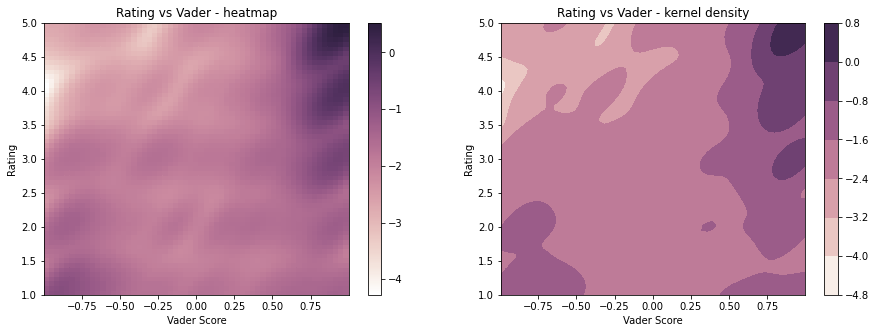

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

Text(0.5, 0, 'length')

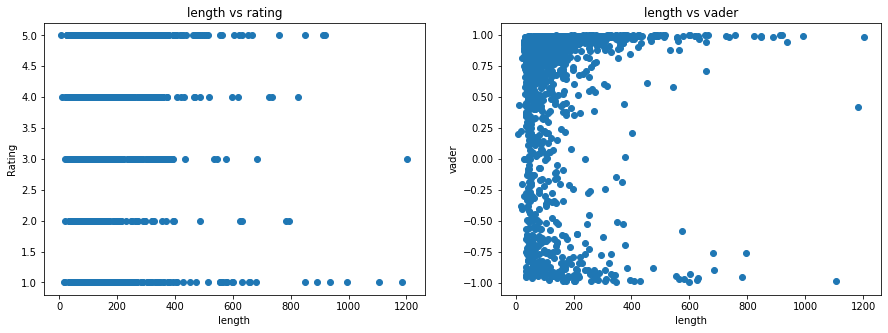

In [ ]:
length = np.array([len(x.split()) for x in finaldf['reviewColumn']])
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(length, rating_scores,"o")
ax[1].plot(length, vader_scores,"o")

ax[0].set_title('length vs rating')
ax[1].set_title('length vs vader')

ax[0].set_ylabel('Rating')
ax[1].set_ylabel('vader')
ax[0].set_xlabel('length')
ax[1].set_xlabel('length')

In [ ]:
k = gaussian_kde(np.vstack([length, rating_scores]))
xi, yi = np.mgrid[length.min():length.max():length.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

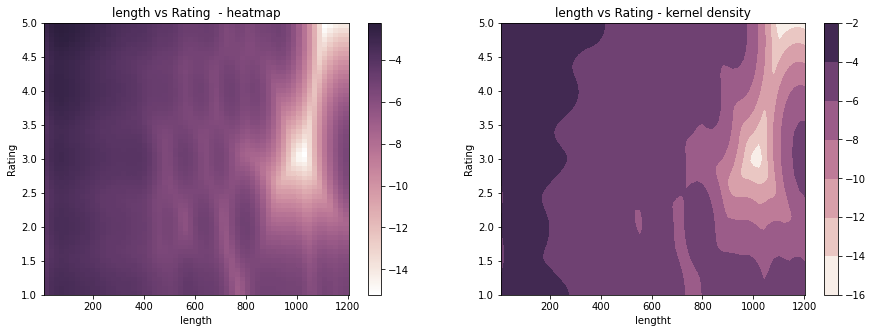

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(length.min(), length.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(length.min(), length.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('length')
ax1.set_ylabel('Rating')

ax2.set_xlabel('lengtht')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('length vs Rating  - heatmap')
ax2.set_title('length vs Rating - kernel density');

In [ ]:
k = gaussian_kde(np.vstack([length, vader_scores]))
xi, yi = np.mgrid[length.min():length.max():length.size**0.5*1j,vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

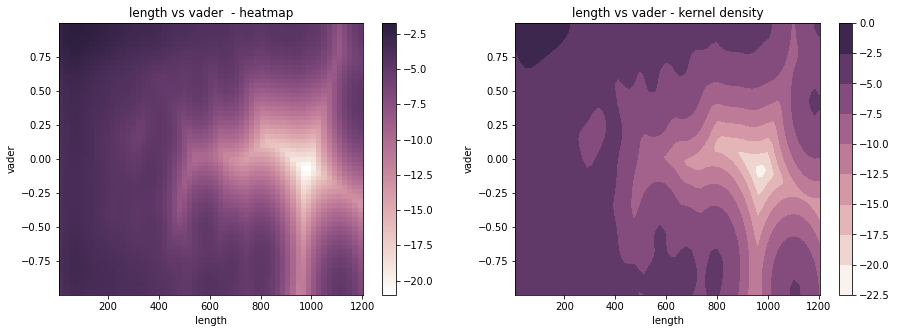

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(length.min(), length.max())
ax1.set_ylim(vader_scores.min(), vader_scores.max())
ax2.set_xlim(length.min(), length.max())
ax2.set_ylim(vader_scores.min(), vader_scores.max())

ax1.set_xlabel('length')
ax1.set_ylabel('vader')

ax2.set_xlabel('length')
ax2.set_ylabel('vader')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('length vs vader  - heatmap')
ax2.set_title('length vs vader - kernel density');

The extremas tend to have review that are longer in length. 

In [31]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['City']+", "+row['Province']

In [33]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df = geo_rating_df.head()
geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address
hotelName,,,,,,,,
Algonquin Moon,0.971050,4.960000,100,32 Swallowdale Rd,"('',)",Ontario,P1H 0A5,"32 Swallowdale Rd, ('',), Ontario"
Arrowhead Inn,0.408178,3.265823,79,210 Arrowhead Park Rd Exit #226 on Highway 11,"('',)",Ontario,P1H 2J4,"210 Arrowhead Park Rd Exit #226 on Highway 11,..."
Bartlett Lodge,0.931924,4.810000,100,Hwy 60 at km 23.5 P.O. Box 10004,"('',)",Ontario,PIH 2G8,"Hwy 60 at km 23.5 P.O. Box 10004, ('',), Ontario"
Beacon Shore Bed &amp; Breakfast,0.970057,4.990000,100,128 Midland Point Rd,"('',)",Ontario,L4R 5H5,"128 Midland Point Rd, ('',), Ontario"
Beauview Cottage Resort,0.965428,4.860000,100,4215 South Portage Rd,"('',)",Ontario,P1H 2J3,"4215 South Portage Rd, ('',), Ontario"


In [38]:
import geopy.geocoders 
from geopy.geocoders  import Nominatim

In [39]:
# 0 - need to give the tool a generic name.
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Algonquin Moon,0.971050,4.960000,100,32 Swallowdale Rd,"('',)",Ontario,P1H 0A5,"32 Swallowdale Rd, ('',), Ontario","(Swallowdale Road, Huntsville, District Munici...","(45.3304024, -79.1542829, 0.0)",45.330402,-79.154283,0.0
Arrowhead Inn,0.408178,3.265823,79,210 Arrowhead Park Rd Exit #226 on Highway 11,"('',)",Ontario,P1H 2J4,"210 Arrowhead Park Rd Exit #226 on Highway 11,...",None,None,NaN,NaN,NaN
Bartlett Lodge,0.931924,4.810000,100,Hwy 60 at km 23.5 P.O. Box 10004,"('',)",Ontario,PIH 2G8,"Hwy 60 at km 23.5 P.O. Box 10004, ('',), Ontario",None,None,NaN,NaN,NaN
Beacon Shore Bed &amp; Breakfast,0.970057,4.990000,100,128 Midland Point Rd,"('',)",Ontario,L4R 5H5,"128 Midland Point Rd, ('',), Ontario","(128, Midland Point Road, Midland, Simcoe Coun...","(44.785867557197044, -79.86699447530006, 0.0)",44.785868,-79.866994,0.0
Beauview Cottage Resort,0.965428,4.860000,100,4215 South Portage Rd,"('',)",Ontario,P1H 2J3,"4215 South Portage Rd, ('',), Ontario","(South Portage Road, Huntsville, District Muni...","(45.2361365, -79.0735192, 0.0)",45.236137,-79.073519,0.0


In [40]:
geo_rating_df.tail()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Algonquin Moon,0.971050,4.960000,100,32 Swallowdale Rd,"('',)",Ontario,P1H 0A5,"32 Swallowdale Rd, ('',), Ontario","(Swallowdale Road, Huntsville, District Munici...","(45.3304024, -79.1542829, 0.0)",45.330402,-79.154283,0.0
Arrowhead Inn,0.408178,3.265823,79,210 Arrowhead Park Rd Exit #226 on Highway 11,"('',)",Ontario,P1H 2J4,"210 Arrowhead Park Rd Exit #226 on Highway 11,...",None,None,NaN,NaN,NaN
Bartlett Lodge,0.931924,4.810000,100,Hwy 60 at km 23.5 P.O. Box 10004,"('',)",Ontario,PIH 2G8,"Hwy 60 at km 23.5 P.O. Box 10004, ('',), Ontario",None,None,NaN,NaN,NaN
Beacon Shore Bed &amp; Breakfast,0.970057,4.990000,100,128 Midland Point Rd,"('',)",Ontario,L4R 5H5,"128 Midland Point Rd, ('',), Ontario","(128, Midland Point Road, Midland, Simcoe Coun...","(44.785867557197044, -79.86699447530006, 0.0)",44.785868,-79.866994,0.0
Beauview Cottage Resort,0.965428,4.860000,100,4215 South Portage Rd,"('',)",Ontario,P1H 2J3,"4215 South Portage Rd, ('',), Ontario","(South Portage Road, Huntsville, District Muni...","(45.2361365, -79.0735192, 0.0)",45.236137,-79.073519,0.0


In [42]:
map1 = folium.Map(
    location=[45.236,-79.0735], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color='#d7191c').add_to(map1), axis=1)

map1

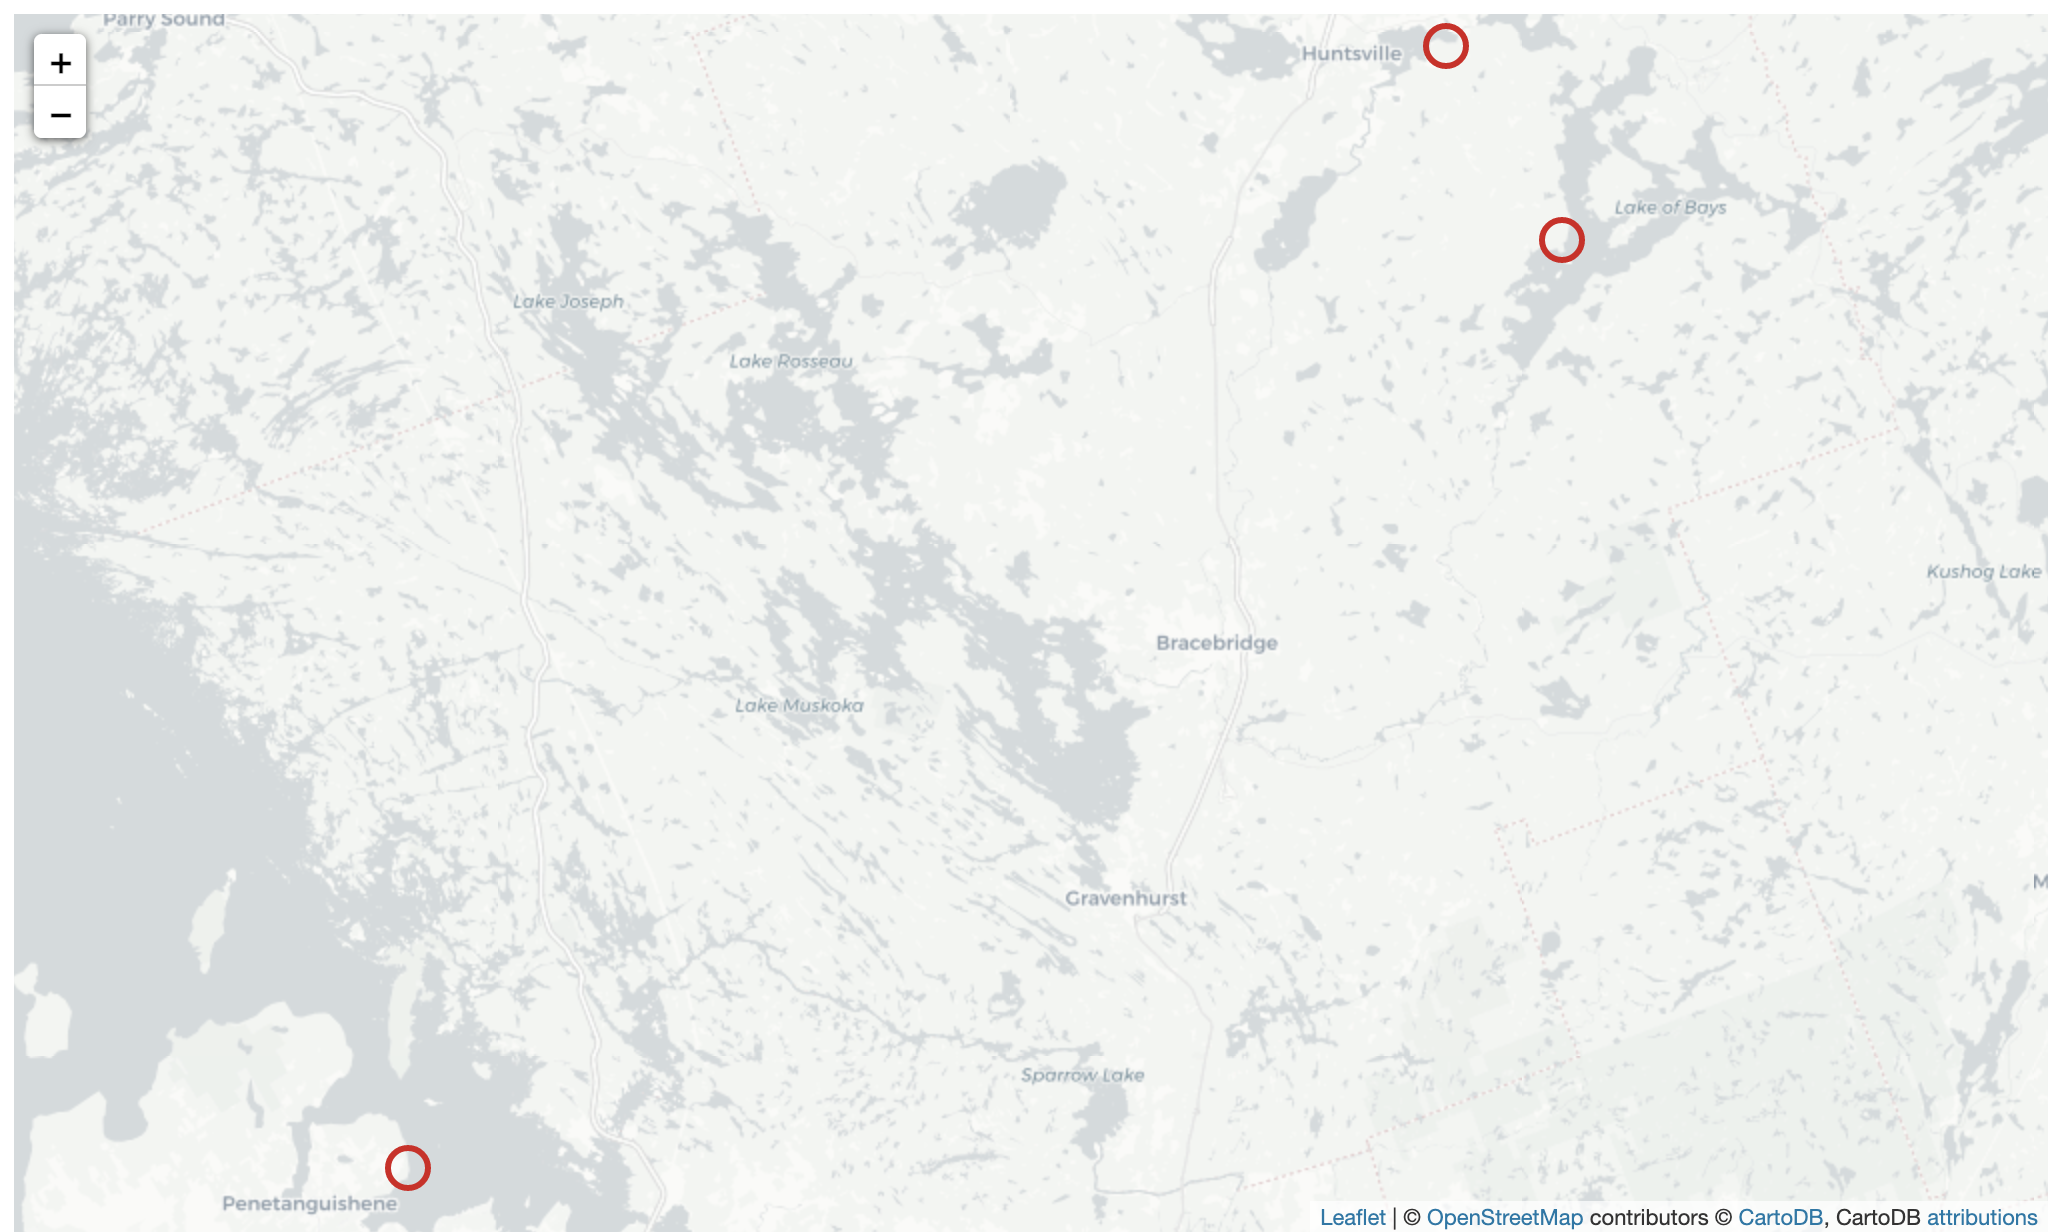

In [45]:
from IPython.display import Image
Image('demo.png')

the closer to attractions (lakes etc) the higher the review is

In [60]:
hotels = ['Ogopogo Resort','Algonquin Moon','Cedar Grove Lodge','Pine Lodge Inn','Econolodge Huntsville','Arrowhead Inn']




In [51]:
for hotel in hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  print (_df)

                                                filePath       hotelName  \
date_stamp                                                                 
October 4, 2022    data/ca/674787/1367838/863134451.html  Ogopogo Resort   
March 20, 2020     data/ca/674787/1367838/751490896.html  Ogopogo Resort   
February 3, 2019   data/ca/674787/1367838/649981650.html  Ogopogo Resort   
March 7, 2019      data/ca/674787/1367838/657052672.html  Ogopogo Resort   
June 20, 2018      data/ca/674787/1367838/589347158.html  Ogopogo Resort   
...                                                  ...             ...   
January 30, 2022   data/ca/674787/1367838/826355029.html  Ogopogo Resort   
August 1, 2020     data/ca/674787/1367838/762608887.html  Ogopogo Resort   
October 4, 2019    data/ca/674787/1367838/715207196.html  Ogopogo Resort   
February 21, 2020  data/ca/674787/1367838/746536912.html  Ogopogo Resort   
February 11, 2018  data/ca/674787/1367838/559808548.html  Ogopogo Resort   

           

In [ ]:
from datetime import datetime, timedelta
today = datetime.today()
yesterday = today - timedelta(days=1)
one_week_ago = today - timedelta(days=7)
two_week_ago = today - timedelta(days=14)
thirty_days_ago = today - timedelta(days=30)

In [122]:
hotels = ['Ogopogo Resort','Algonquin Moon','Cedar Grove Lodge','Pine Lodge Inn','Arrowhead Inn','Red Maple Inn and Suites ']

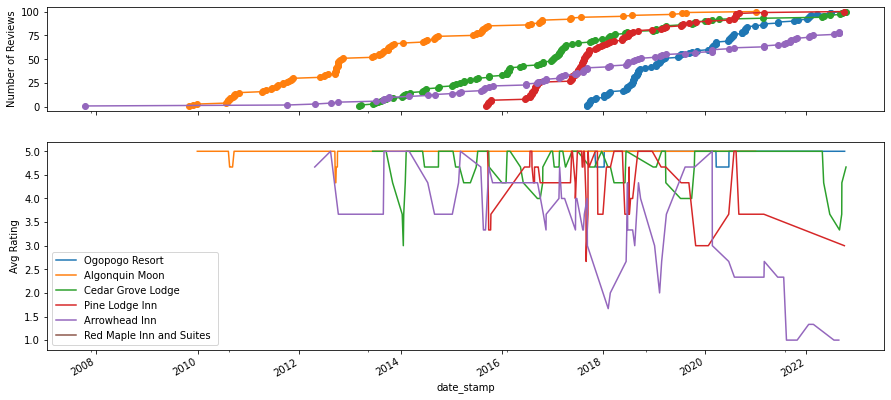

In [130]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)
ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

For mediocre and bad hotels, their reviews seem to be trending downward after the covid lockdown. It might be influenced by the social events due to inflation etc. Overall, there is no consistent trends.

The rate of reviews (number of reviews) are trending downward as well. This is expected with the covid lockdowns and the fact that when a hotel first opened, there will be more guests to visit the hotel.